## Space Mission Launches<a id='Space Mission Launches'></a>
* Content
  * [Introduction](##1._Introduction)
  * [Import](#2.2_Introduction)

## 1. Introduction

About Dataset
You'll find an incredibly rich dataset from nextspaceflight.com that includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957! It has data on the mission status (success/failure), the cost of the mission, the number of launches per country, and much much more. There's so much we can learn from this dataset about the dominant organisations and the trends over time. For example:

Who launched the most missions in any given year?

How has the cost of a space mission varied over time?

Which months are the most popular for launches?

Have space missions gotten safer or has the chance of failure remained unchanged?

This Dataset contains information on dates, costs, and status regarding space missions from different organisations such as NASA, SpaceX, CASC

Link to dataset: https://www.kaggle.com/datasets/sefercanapaydn/mission-launches

## 2. Import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## 2.1 Load the dataset

In [9]:
data = pd.read_csv('/Users/sangth/Desktop/Space_project /Space_Mission_Launches/Data/mission_launches.csv')

## 2.2 Explore the dataset

In [14]:
data.shape

(4324, 9)

In [15]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [27]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [52]:
data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Year                 0
Month                0
Day                  0
Weekday              0
Hour                 0
Country              0
dtype: int64

In [29]:
data.dtypes

Unnamed: 0.1                    int64
Unnamed: 0                      int64
Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                          object
Mission_Status                 object
dtype: object

## 2.3 Manipulate the dataset

Add Year, Month, Day Columns from location column

In [36]:
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Day'] = data['Date'].apply(lambda x: x.day)
data['Weekday'] = data['Date'].apply(lambda x: x.weekday)
data['Hour'] = data['Date'].apply(lambda x: x.hour)


In [37]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day,Weekday,Hour
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8,7,4,5
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,6,3,4
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8,4,1,23
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,7,30,3,21
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7,30,3,11


Add Country Column from Location. This column contains the country from which the missile was launched. I need the column that contains information about the country that launched the rocket. I will change the contents of this cell to be more accurate

In [54]:
data['Country'] = data['Location'].apply(lambda x: x.split(',')[-1].strip())
data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day,Weekday,Hour,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8,7,4,5,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,6,3,4,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8,4,1,23,USA


Check the value of each country

In [55]:
data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

Note: Kazakhstan is a company in Russia 

In [56]:
data[data['Country'].isin(['Kazakhstan'])]['Organisation'].value_counts()


RVSN USSR      579
Roscosmos       47
VKS RF          44
Kosmotras       12
Land Launch      7
ILS              6
Arianespace      2
OKB-586          2
Starsem          1
Yuzhmash         1
Name: Organisation, dtype: int64

"RVSN USSR","Roscosmos" and "VKS RF" are companies from Russia. I will have assigned 'Russia' fpr this values in column "Country"

In [57]:
rus_company_index = data[data['Organisation'].isin(["RVSN USSR", "Roscosmos","VKS RF"])].index
data.loc[rus_company_index, ['Country']] = 'Russia' 
data['Country'].value_counts()

Russia                            2065
USA                               1344
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Kazakhstan                          31
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

All lines with the meaning of "Russia" before 1991-12-26 I will replace with the "USSR" for historical justice. The USSR ceased to exist on December 26, 1991.

In [58]:
ussr_country_index = data[(data['Date'].dt.date < datetime.date(1991, 12, 26)) & (data['Country'] == 'Russia')].index
data.loc[ussr_country_index, ['Country']] = 'USSR'
data['Country'].value_counts()

USSR                              1767
USA                               1344
France                             303
Russia                             298
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Kazakhstan                          31
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

Top 5 Countries in number of missions

In [81]:
top5_countries_missions = data['Country'].value_counts()[:5]
top5_countries_missions

USSR      1767
USA       1344
France     303
Russia     298
China      268
Name: Country, dtype: int64

Top 7 organisations in number of missions

In [61]:
top7_orgz_missions = data['Organisation'].value_counts()[:7]
top7_orgz_missions

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
Name: Organisation, dtype: int64

Text(0.5, 0.98, 'Number of Mission')

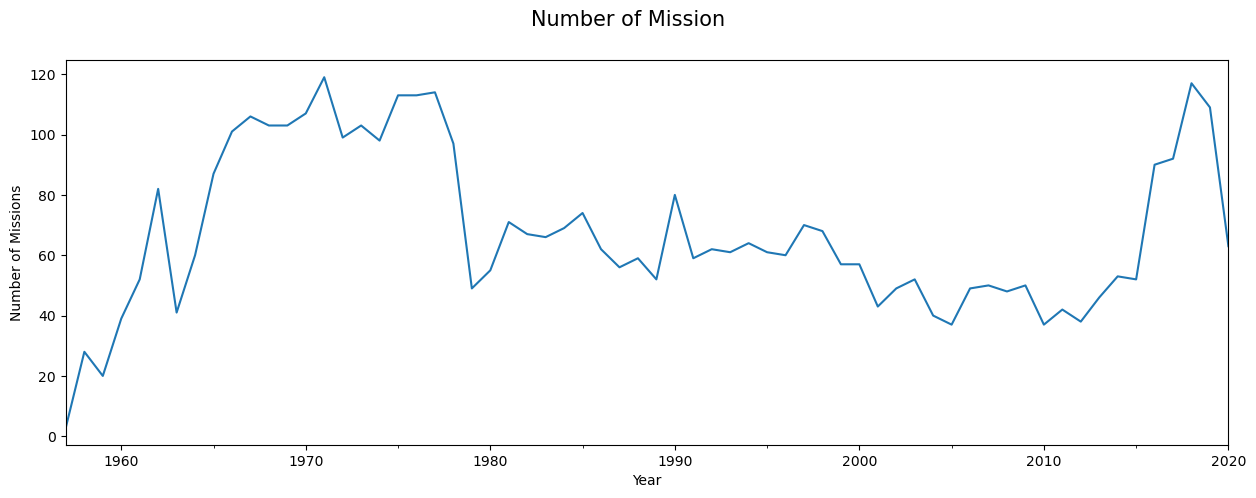

In [68]:
fig, ax = plt.subplots(figsize= (15,5));

(
    data
        .set_index(['Date'])
        .groupby([pd.Grouper(freq='Y')])
        .size()
        .plot()
);

ax.set_xlabel('Year');
ax.set_ylabel('Number of Missions');
ax.figure.suptitle('Number of Mission', size = 15)

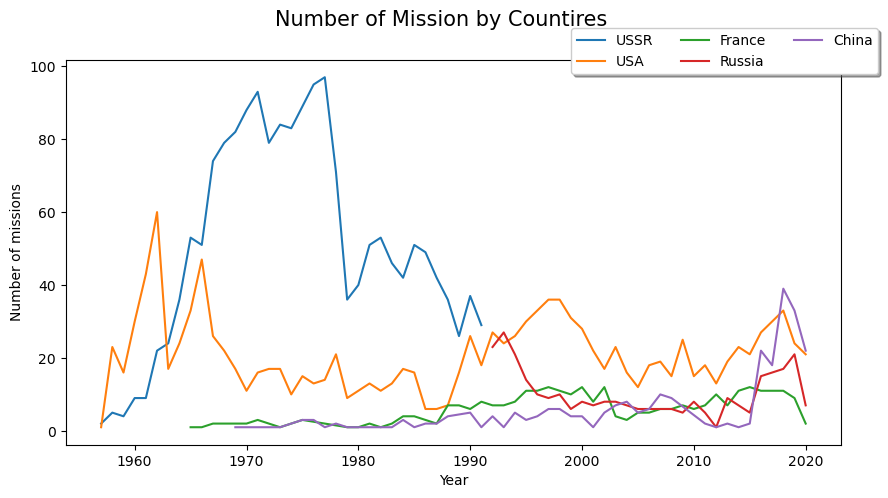

In [75]:
data_country_year = data.groupby(['Country', 'Year']).size().reset_index()
data_country_year.columns = ['Country', 'Year', 'Number_of_missions']

# Condition for selecting rows for "year"
# year_1950_1990 = data_country_year['Year'].between(1950, 1990)
# year_1990_2020 = data_country_year['Year'].between(1990, 2020)

fig, ax = plt.subplots(figsize=(10,5));
ax.set_xlabel('Year');
ax.set_ylabel('Number of missions');
ax.figure.suptitle('Number of Mission by Countires', size=15)

for country in top5_countries_missions.index.values:
#   Condition for selecting rows for "country"
    cnd_country = data_country_year['Country'].isin([country])
    ax.plot(data_country_year[cnd_country]['Year'],
            data_country_year[cnd_country]['Number_of_missions'], label=country);
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.1),
          ncol=3, fancybox=True, shadow=True);


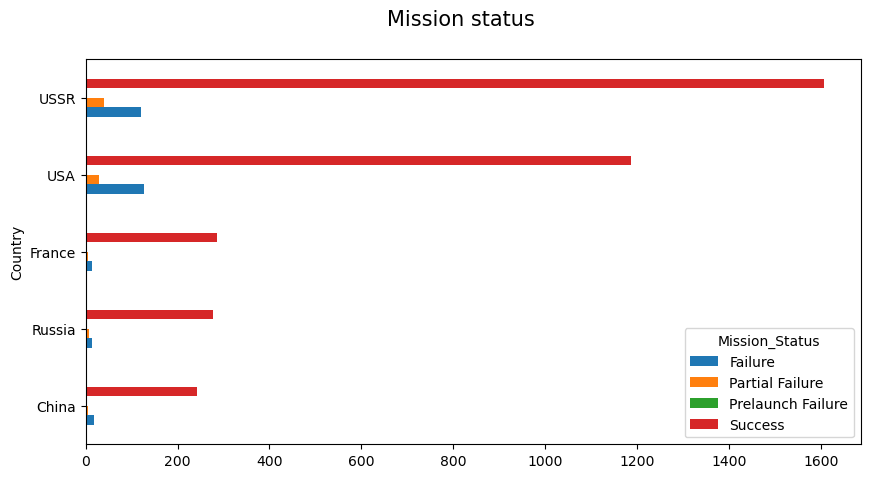

In [78]:
fig, ax = plt.subplots(figsize=(10,5));

(
    pd.crosstab(data[data['Country'].isin(top5_countries_missions.index.values)]['Country'], 
            data[data['Country'].isin(top5_countries_missions.index.values)]['Mission_Status'])
    .reset_index()
    .set_index(['Country'])
    .sort_values(by=['Success'])
    .plot.barh(ax=ax)
);

ax.figure.suptitle('Mission status', size=15);

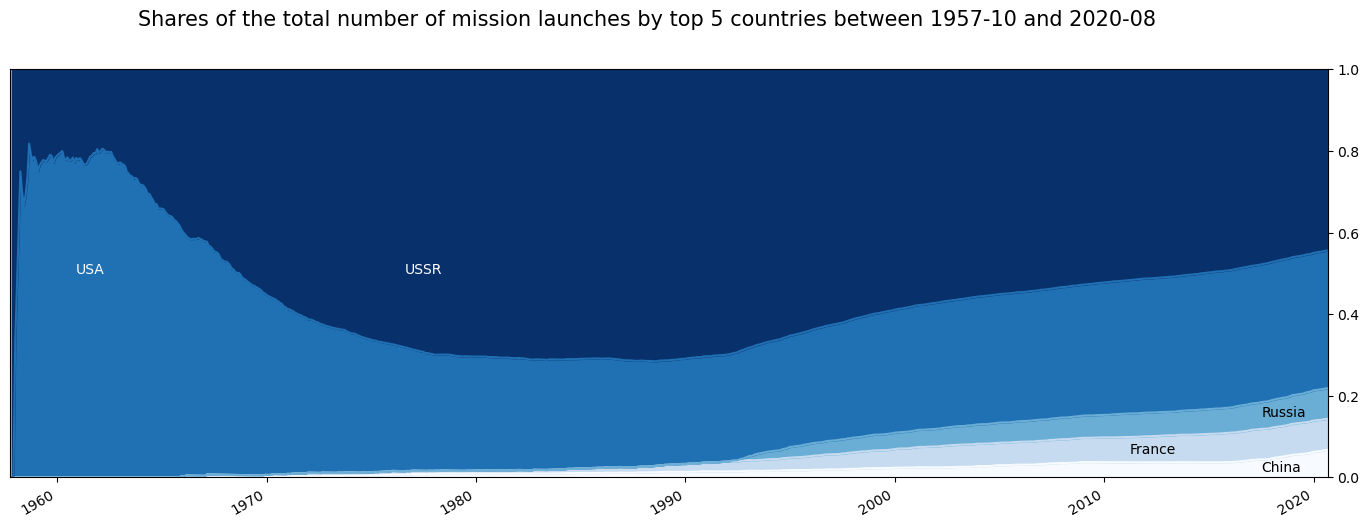

In [82]:
fig, ax = plt.subplots(figsize=(17,6));

(
    data[data['Country']
       .isin(top5_countries_missions.index.values)][['Date', 'Country']]
       .set_index(['Date'])
       .groupby([pd.Grouper(freq='M'), 'Country'])
       .size()
       .unstack(fill_value=0)
       .cumsum()
       .pipe(lambda data_: data_.div(data_.sum(axis='columns'), axis='index'))
       .plot.area(ax=ax, cmap='Blues', xlim=('1957-10', '2020-09'), 
                  ylim=(0, 1), legend=False)
);

ax.figure.suptitle('Shares of the total number of mission launches by top 5 countries between 1957-10 and 2020-08', size=15)
ax.set_xlabel('')
ax.yaxis.tick_right()
# ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.1),
#           ncol=3, fancybox=True, shadow=True)

kwargs = {'xycoords':'axes fraction', 'size':10}
ax.annotate(xy=(.05, .5), text='USA',color='w', **kwargs);
ax.annotate(xy=(.3, .5), text='USSR',color='w', **kwargs);
ax.annotate(xy=(.95, .015), text='China',color='k', **kwargs);
ax.annotate(xy=(.85, .06), text='France',color='k', **kwargs);
ax.annotate(xy=(.95, .15), text='Russia',color='k', **kwargs);

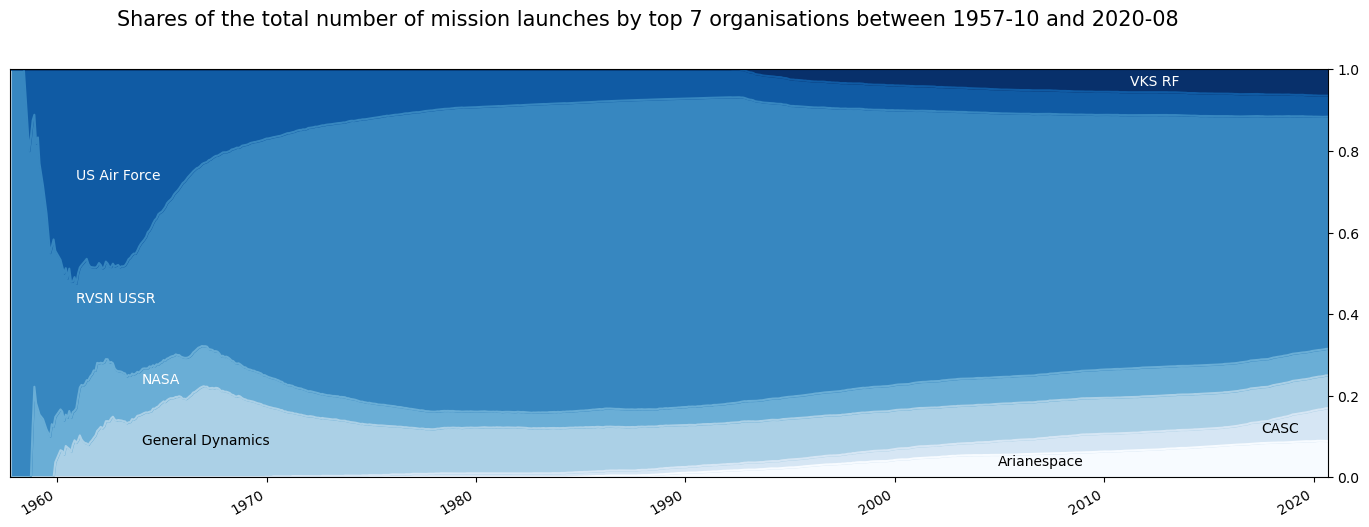

In [83]:
fig, ax = plt.subplots(figsize=(17,6));

(
    data[data['Organisation']
       .isin(top7_orgz_missions.index.values)][['Date', 'Organisation']]
       .set_index(['Date'])
       .groupby([pd.Grouper(freq='M'), 'Organisation'])
       .size()
       .unstack(fill_value=0)
       .cumsum()
       .pipe(lambda data_: data_.div(data_.sum(axis='columns'), axis='index'))
       .plot.area(ax=ax, cmap='Blues', xlim=('1957-10', '2020-09'), 
                  ylim=(0, 1), legend=False)
);

ax.figure.suptitle('Shares of the total number of mission launches by top 7 organisations between 1957-10 and 2020-08', size=15)
ax.set_xlabel('')
ax.yaxis.tick_right()
# ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.1),
#           ncol=3, fancybox=True, shadow=True);

ax.annotate(xy=(.75, .03), text='Arianespace',color='k', **kwargs);
ax.annotate(xy=(.95, .11), text='CASC',color='k', **kwargs);
ax.annotate(xy=(.1, .08), text='General Dynamics',color='k', **kwargs);
ax.annotate(xy=(.1, .23), text='NASA',color='w', **kwargs);
ax.annotate(xy=(.05, .43), text='RVSN USSR',color='w', **kwargs);
ax.annotate(xy=(.05, .73), text='US Air Force',color='w', **kwargs);
ax.annotate(xy=(.85, .96), text='VKS RF',color='w', **kwargs);